In [5]:
import nibabel as nib
import numpy as np

In [3]:
def read_nifti_file(filepath):
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan

# Training Segment Data Loading

In [12]:
x = read_nifti_file("Labelled_weekly_MR_images_of_the_male_pelvis/HipMRI_study_complete_release_v1/semantic_MRs_anon/Case_004_Week0_LFOV.nii.gz")


In [19]:
# standardization 
x_q = (x - x.mean()) / x.std()
x_q.shape

(256, 256, 128)

In [63]:
x.shape

(256, 256, 128)

# Label Pre-Processing

In [23]:
y = read_nifti_file("Labelled_weekly_MR_images_of_the_male_pelvis/HipMRI_study_complete_release_v1/semantic_labels_anon/Case_004_Week0_SEMANTIC_LFOV.nii.gz")

In [18]:
y.shape

(256, 256, 128)

In [8]:
np.unique(y)

array([0., 1., 2., 3., 4., 5.])

In [24]:
y = y.astype(np.uint8)
np.unique(y)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [10]:
# Change the 2D Array of size 64*64 into a single 1D Array of size 4096
y = y.astype(int)
y = np.ravel(y)

# Print the frequency of occurences for each of the values of range 0 to 255
unique, counts = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[      0 4191973]
 [      1 3769515]
 [      2  317298]
 [      3   66461]
 [      4   23485]
 [      5   19876]]


0 -> black background surrounding [unlabelled]
1 ->> body, major part
2 ->> area surrounding (3), (4) and (5)
3 ->> gray area right above (5)
4 ->> gray area below (5)
5 ->> whitest area in the middle

In [25]:
from tensorflow.keras.utils import to_categorical

y_cate = to_categorical(y, num_classes=6)
y_cate.shape

(256, 256, 128, 6)

In [28]:
y_cate = y_cate.astype(np.uint8)
y_cate[2][2][2]

array([1, 0, 0, 0, 0, 0], dtype=uint8)

Text(0.5, 1.0, 'Label Image')

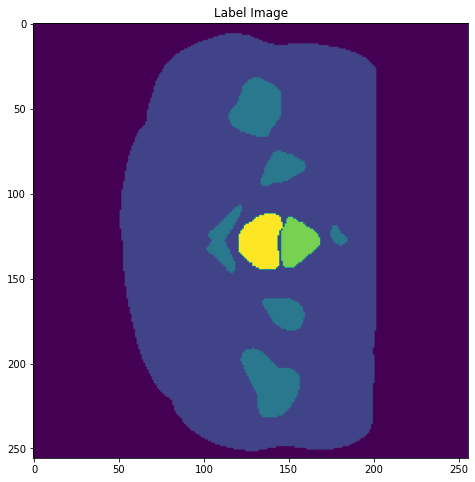

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))


plt.imshow(y[:,:,55])
plt.title("Label Image")

# Future Notes to continue

GitHub reference -> https://github.com/bnsreenu/python_for_microscopists/blob/master/231_234_BraTa2020_Unet_segmentation/232_brats2020_get_data_ready.py

Reference video -> https://www.youtube.com/watch?v=oB35sV1npVI
